In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

execfile ("_ImportScript.py")

1


In [2]:
# Make a Universe with large n_max
beatbox.You.initiate_simulated_universe( truncated_nmax=15, truncated_nmin=None, truncated_lmax=60, truncated_lmin=None, n_s=0.97,kstar=0.02,PSnorm=2.43e-9,Pdist=1,Pmax=2*np.pi,Pvar=0.0, fngrid=None, printout=1)

Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 1.2819413


/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:580: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*10000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))


In [ ]:
beatbox.You.all_simulated_universes[0].show_CMB_T_map()

In [ ]:
beatbox.You.initiate_simulated_universe( truncated_nmax=None, truncated_nmin=None, truncated_lmax=None, truncated_lmin=None, n_s=0.97,kstar=0.02,PSnorm=2.43e-9,Pdist=1,Pmax=2*np.pi,Pvar=0.0, fngrid=None, printout=1)

In [ ]:
beatbox.You.all_simulated_universes[0].show_CMB_T_map()

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


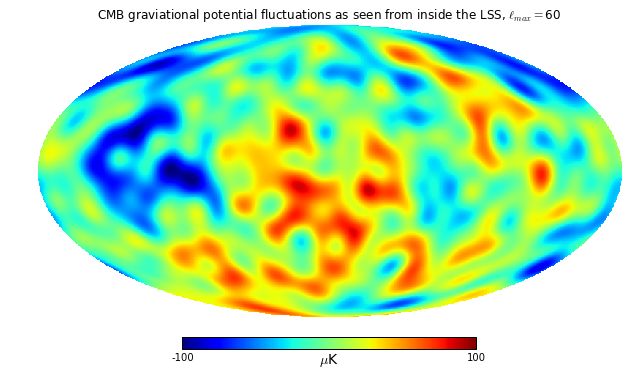

In [3]:
beatbox.You.all_simulated_universes[0].show_CMB_T_map()

In [ ]:
this_file='RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/TrueUniverse'
beatbox.You.all_simulated_universes[0].write_CMB_T_map(from_this=beatbox.You.all_simulated_universes[0].Tmap, to_this=this_file)

In [ ]:
# Calculate C_yy from the 100 posterior sample Commander Planck CMB temperature maps 
#    or load the C_yy matrix if already calculated
if not os.path.isfile('../data/covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin)):
    beatbox.You.read_Planck_samples()
    beatbox.You.calculate_covariance_matrix(filename='lmax%d_lmin%d' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
else:
    beatbox.You.load_covariance_matrix(filename='covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
    
# Calculate the inverse of the a_y covariance matrix
beatbox.You.calculate_sdv_Cyy_inverse()

In [ ]:
numreal = 1000
MockUniverse = np.array([])
MockUniverse = np.append(MockUniverse, [beatbox.Universe() for i in range(numreal)])
beatbox.You.all_simulated_universes[0].lms = [(l, m) for l in range(beatbox.You.all_simulated_universes[0].truncated_lmin,beatbox.You.all_simulated_universes[0].truncated_lmax+1) for m in range(-l, l+1)]
MockUniverse[0].truncated_lmax = 60
MockUniverse[0].truncated_nmax = 15
MockUniverse[0].set_instance_k_filter(truncated_nmax=None,truncated_nmin=None)
MockUniverse[0].populate_instance_response_matrix(truncated_nmax=None, truncated_nmin=None,truncated_lmax=None, truncated_lmin=None, usedefault=1)
for i in range(numreal):
    MockUniverse[i].truncated_lmax = MockUniverse[0].truncated_lmax
    MockUniverse[i].truncated_nmax=MockUniverse[0].truncated_nmax
    MockUniverse[i].R = MockUniverse[0].R 
    MockUniverse[i].kfilter = MockUniverse[0].kfilter
    MockUniverse[i].lms = beatbox.You.all_simulated_universes[0].lms 

In [ ]:
Noise = np.zeros(len(beatbox.You.all_simulated_universes[0].ay))
ay_real = beatbox.You.all_simulated_universes[0].ay2ayreal_for_inference(beatbox.You.all_simulated_universes[0].ay)
beatbox.You.all_simulated_universes[0].ay_real = ay_real
for n in range(numreal):
    Noise[:beatbox.You.C_yy.shape[0]] = beatbox.You.generate_one_realization_of_noise()
    MockUniverse[n].ay_real = beatbox.You.all_simulated_universes[0].ay_real + Noise
    MockUniverse[n].ayreal2ay_for_mapping(MockUniverse[n].ay_real)
    MockUniverse[n].ay2alm(MockUniverse[n].ay, truncated_lmax=MockUniverse[n].truncated_lmax, truncated_lmin=MockUniverse[n].truncated_lmin, usedefault=0)
    MockUniverse[n].Tmap = hp.alm2map(MockUniverse[n].alm, 256)
    this_file='RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/MockUniverse_'+str(n)
    MockUniverse[n].write_CMB_T_map(from_this=MockUniverse[n].Tmap, to_this=this_file)


In [ ]:
MOCK = 0
numreal = 10
beatbox.You.create_original_Universe()

beatbox.You.all_simulated_universes = np.append(beatbox.You.all_simulated_universes, beatbox.Universe())
beatbox.You.all_simulated_universes[-1].fngrid= beatbox.You.all_simulated_universes[0].fngrid * beatbox.Universe.kfilter
beatbox.You.all_simulated_universes[-1].transform_3D_potential_into_alm()
beatbox.You.all_simulated_universes[0]=beatbox.Universe()
beatbox.You.all_simulated_universes[0].generate_a_random_potential_field()

# beatbox.You.all_simulated_universes = np.append(beatbox.You.all_simulated_universes, beatbox.Universe())
# fromthis = 'RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/TrueUniverse.fits'
# beatbox.You.all_simulated_universes[-1].read_in_CMB_T_map(from_this = fromthis)
# beatbox.You.all_simulated_universes[-1].decompose_T_map_into_spherical_harmonics(lmax=60)
# beatbox.You.all_simulated_universes[-1].alm2ay()
# beatbox.You.all_simulated_universes[-1].ay2alm(beatbox.You.all_simulated_universes[-1].ay)

beatbox.You.all_reconstructed_universes = np.append(beatbox.You.all_reconstructed_universes, [beatbox.Universe() for i in range(numreal)])
MockUniverse = np.array([])
MockUniverse = np.append(MockUniverse, [beatbox.Universe() for i in range(numreal)])
pvals=np.array([])
chi2vals=np.array([])

#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=8, usetex=True)
from matplotlib import cm
cmap = cm.RdBu_r
cmap.set_under('w')

max=100

# Calculate C_yy from the 100 posterior sample Commander Planck CMB temperature maps 
#    or load the C_yy matrix if already calculated
if not os.path.isfile('../data/covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin)):
    beatbox.You.read_Planck_samples()
    beatbox.You.calculate_covariance_matrix(filename='lmax%d_lmin%d' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
else:
    beatbox.You.load_covariance_matrix(filename='covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
    
# Calculate the inverse of the a_y covariance matrix
beatbox.You.calculate_sdv_Cyy_inverse()




In [22]:

for n in range(numreal):
    fromthis = 'RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/MockUniverse_'+str(n)+'.fits'
    
    beatbox.You.all_data_universes = np.append(beatbox.You.all_data_universes, beatbox.Universe())
    beatbox.You.all_data_universes[n].read_in_CMB_T_map(from_this = fromthis)
    beatbox.You.all_data_universes[n].decompose_T_map_into_spherical_harmonics(lmax=60)
    beatbox.You.all_data_universes[n].alm2ay()
    beatbox.You.all_data_universes[n].ay2alm(beatbox.You.all_data_universes[n].ay)
    datamap = beatbox.You.all_data_universes[n].ay2ayreal_for_inference(beatbox.You.all_data_universes[n].ay)
    beatbox.You.all_data_universes[n].ay_real = datamap
    beatbox.You.solve_for_3D_potential(datamap)
    
    #execfile ('_ReconstructionScript.py')
    MockUniverse[n]=beatbox.You.all_data_universes[n]
    beatbox.You.all_reconstructed_universes[n].fn = beatbox.You.reconstrunct_fn
    beatbox.You.all_reconstructed_universes[n].transform_3D_potential_into_alm(usedefault=1, fn=1)
    beatbox.You.all_reconstructed_universes[n].rearrange_fn_from_vector_to_grid()
    beatbox.You.all_reconstructed_universes[n].evaluate_potential_given_fourier_coefficients()
    
    p_value, chi2value = beatbox.You.calculate_chi2_in_posterior( beatbox.You.all_simulated_universes[-1].fn, beatbox.You.all_reconstructed_universes[n].fn)
    pvals = np.append(pvals, p_value)
    chi2vals = np.append(chi2vals, chi2value)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Built potential grid, with dimensions  (41, 41, 41)  and mean value  -0.0 +/- 0.3274233
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Built potential grid, with dimensions  (41, 41, 41)  and mean value  -0.0 +/- 0.3272128
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Built potential grid, with dimensions  (41, 41, 41)  and mean value  -0.0 +/- 0.3276197
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Built potential grid, with dimensions  (41, 41, 41)  and mean value  -0.0 +/- 0.3294167
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Built potential grid, with dimensions  (41, 41, 41)  and mean value  -0.0 +/- 0.330928
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Built potential grid, with dimensions  (41, 41, 41)  and mean value  -0.0 +/- 0.3384095
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Built potential grid, with dimensions  (41, 41

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


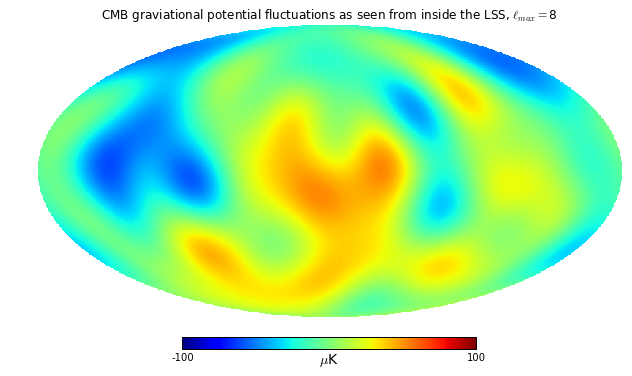

In [4]:
beatbox.You.create_original_Universe()
beatbox.You.all_simulated_universes = np.append(beatbox.You.all_simulated_universes, beatbox.Universe())
beatbox.You.all_simulated_universes[-1].fngrid= beatbox.You.all_simulated_universes[0].fngrid * beatbox.Universe.kfilter
beatbox.You.all_simulated_universes[-1].transform_3D_potential_into_alm()
beatbox.You.all_simulated_universes[-1].show_CMB_T_map()


In [5]:
print beatbox.You.all_simulated_universes[-1].fn

[ -3.87800339e-01   1.48412003e+00  -2.63478914e-01   3.48906751e-01
  -3.22408702e-01   6.84976852e-01   7.46648190e-01  -1.27953234e-01
   1.04885461e+00  -2.34935963e-02   1.14134260e-01   3.11160563e-01
  -2.56407865e-02  -3.08456665e-01  -8.25635104e-02  -1.20296020e-01
   6.11915858e-01  -9.71630949e-01   1.23044557e+00   1.86292067e-02
  -8.44908888e-02  -1.84572343e-01   9.26688215e-01  -2.05916103e-01
  -5.46040894e-01   2.06296807e-01   4.88501165e-02   6.20999308e-01
  -5.60594797e-01  -4.31277489e-01  -9.01734375e-02   4.04144445e-01
  -3.34765536e-02   6.20913283e-01   2.16924614e-02   2.46405871e-01
   3.11395752e-02  -5.58689428e-01   1.55858707e-01   5.52888673e-02
   4.36484435e-01   1.27260892e+00   1.25203356e-01  -7.34229251e-01
   1.56456448e+00   7.77022437e-01   1.28818603e+00   6.88824768e-02
  -2.51105282e-01   7.45733089e-02  -8.51858664e-01  -1.08104906e+00
   2.52730758e-01   4.39368084e-01  -2.84536228e-01   2.47979682e-02
  -1.06003262e-01  -6.93650692e-01

In [17]:
print beatbox.You.all_reconstructed_universes[8].fn

[ -6.10505310e-02   3.99227345e-01   3.84878097e-01   2.04790178e-01
   9.46891946e-02   5.12401041e-01   3.54072634e-01  -7.34559740e-02
  -1.72777301e-01  -1.22526910e-01   7.70856836e-02   2.58900157e-01
  -9.19874517e-02  -5.53310585e-01  -4.79702293e-01  -1.49728479e-01
  -3.25614839e-02  -6.90514692e-02  -3.36536628e-02  -2.63220041e-01
  -4.54728735e-01  -1.93686026e-01   1.53318658e-01  -1.56363962e-01
  -2.09551502e-01  -1.72167988e-02   6.42277333e-02   4.74976071e-02
   1.98774260e-01   3.38351605e-01  -1.94462751e-01   1.42943415e-01
   2.86556721e-01   1.38569225e-01   3.46751348e-02   1.95020311e-01
   1.83081639e-01  -1.04628016e-01  -4.84099209e-02  -1.45624773e-01
  -3.11466215e-01  -1.55743617e-01   2.06154963e-01  -4.50485916e-01
  -1.24386129e-01   2.13409432e-01   2.42900778e-01   2.87586068e-01
   4.61895966e-01   4.03110282e-01  -3.39167600e-01  -4.63334099e-01
  -2.96597190e-02   5.50421380e-01   5.37528463e-01   2.58837090e-01
   2.12911564e-01   1.11004864e-01

[ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf
  inf  inf  inf  inf  inf] [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.] [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] [ 42962535.12671159  42991502.68930602  42992508.35011877
  42953482.23568162  42982959.71265975  42998057.86392099
  42991941.74782793  42996154.56183627  42997590.78204089
  42977152.30027864  42962535.12671159  42991502.68930602
  42992508.35011877  42953482.23568162  42982959.71265975
  42998057.86392099  42991941.74782793  42996154.56183627
  42997590.78204089  42977152.30027864  42962535.12671159
  42991502.68930602  42992508.35011877  42953482.23568162
  42982959.71265975  42998057.86392099  42991941.74782793
  42996154.56183627  42997590.78204089  42977152.30027864]
-114.189918955
7.05018993161e-115


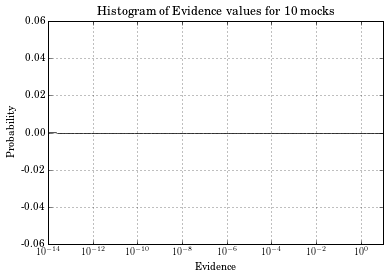

In [23]:
#beatbox.You.all_simulated_universes = np.append(beatbox.You.all_simulated_universes, beatbox.Universe())
#beatbox.You.all_simulated_universes[-1].fngrid= beatbox.You.all_simulated_universes[0].fngrid*beatbox.Universe.kfilter
#beatbox.You.all_simulated_universes[-1].transform_3D_potential_into_alm()
#fromthis = 'RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/TrueUniverse.fits'
#beatbox.You.all_simulated_universes[-1].read_in_CMB_T_map(from_this = fromthis)
#beatbox.You.all_simulated_universes[-1].decompose_T_map_into_spherical_harmonics(lmax=60)
#beatbox.You.all_simulated_universes[-1].alm2ay()
#beatbox.You.all_simulated_universes[-1].ay2alm(beatbox.You.all_simulated_universes[-1].ay)
#beatbox.You.all_simulated_universes[-1].show_CMB_T_map()
#execfile ('_SigmaDevPlot.py')
print sigmas_dev, probabilities2, pvals, chi2vals
execfile('_CalcEvidence.py')


Displaying sky map of the l =  8  and lower spherical harmonics only...
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


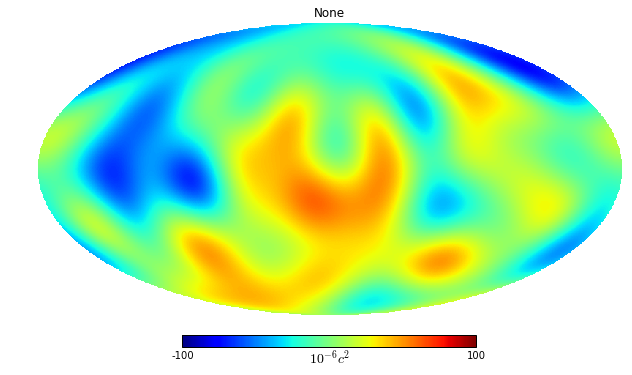

In [6]:
beatbox.You.all_simulated_universes[0].lmax=60
beatbox.You.all_simulated_universes[0].show_lowest_spherical_harmonics_of_CMB_T_map(lmax=8,max=100)

In [ ]:
hp.mollview(beatbox.You.all_simulated_universes[0].truncated_map-We.Tmap,rot=(-90,0,0),min=-100,max=100, unit="$10^{-6}c^2$")
hp.mollview(WeRes.Tmap,  rot=(-90,0,0),title="CMB graviational potential fluctuations as seen from inside the LSS, l_max=%d, alms diff" % We.truncated_lmax, min=-100,max=100, cmap=None)

In [ ]:
print beatbox.You.all_simulated_universes[-3].alm.shape
print beatbox.You.all_data_universes[-1].alm.shape

In [ ]:
beatbox.You.all_simulated_universes[-3].truncated_lmax

In [ ]:
len(beatbox.You.all_data_universes)

In [21]:
beatbox.You.all_data_universes[0].ay_real

AttributeError: 'Universe' object has no attribute 'ay_real'

In [24]:
beatbox.You.all_data_universes[-1].
beatbox.You.all_data_universes[-1].show_CMB_T_map()
beatbox.You.all_reconstructed_universes[-1].show_CMB_T_map()
hp.mollview(beatbox.You.all_data_universes[-1].Tmap-beatbox.You.all_reconstructed_universes.Tmap,  rot=(-90,0,0),title="Residuals of Temperature Fluctuations, l_max=%d, Tmap diff" % We.truncated_lmax, cmap=cmap)

AttributeError: 'Universe' object has no attribute 'alm'

AttributeError: 'Universe' object has no attribute 'fn'